In [2]:
from platform import python_version

print(python_version())

import matplotlib.pyplot as plt
import matplotlib.lines as mlines

from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import AllChem

from mendeleev import element

#import chemcoord as cc

from rdkit import Chem
import seaborn as sns
import pandas as pd
import numpy as np
import shutil
import glob
import csv
import ast
import os
import re
from astroquery.linelists.cdms import CDMS
import astropy.units as u
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
#import rmsd

#sns.set_context('poster', font_scale=1.1)
#pd.set_option('display.max_rows', None)  

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

3.10.6


In [3]:
## DataFile  ##
data_all = pd.read_csv('/Users/z5380625/Documents/Research/4_BigData/Plots/B971_def2TZVPD_DataFile1_GroundState.csv')

In [4]:
np.max(data_all['# Atoms'].values)

20

In [5]:
tot_nH_atoms_list = []
SMILES_list = data_all['SMILES'].values
for smile in SMILES_list:
    tot_nH_atoms = smile.count('C')+smile.count('N')+smile.count('O')+smile.count('P')+smile.count('S')
    tot_nH_atoms_list.append(tot_nH_atoms)
    print(smile,tot_nH_atoms)

C#C 2
O=CC=O 4
C#CSO 4
O=CC=S 4
C1=CO1 3
C=C=O 3
C1C(=S)S1 4
S=CC=S 4
C1=CS1 3
C=C=S 3
C1=CN1 3
N#CC 3
C[N+]#[C-] 3
C=C 2
[N-]=[N+]=CC#N 5
C(=O)C#N 4
SC(C#N)=S 5
O=PC#C 4
N#CC#N 4
N#CN=C=O 5
N#CN=C=S 5
C(=C=S)=S 4
C1=CC1=O 4
C=C=C=O 4
O=CC#C 4
C#CC#N 4
N#CC=C=O 5
O=C(C#N)C#N 6
C(=C=S)=C=S 5
C#CC#C 4
C(=C=C=S)=C=S 6
N#CN 3
N#CNO 4
N=C(N=O) 4
N#CSN 4
C=O 2
O=CO 3
C(=O)OO 4
C=S=O 3
C=S 2
O=CN 3
S=CN 3
O=PC 3
C 1
OC 2
SC 2
C#N 2
[N-]=[N+]=NC=O 5
N#CS(O)=O 5
[O-][N+](=O)C=O 5
OC(=O)N=O 5
OC#N 3
N=C=O 3
SC#N 3
C(=O)(N=O)N=O 6
N#CSN=O 5
N#CN=O 4
[C-]#[O+] 2
O=C=O 3
O=C=S 3
S=C=S 3
N[N+](=O)[O-] 4
O 1
OO 2
OSSO 4
O=S(O)O 4
S 1
N 1
NO 2
O=[PH2]O 3
[H][P]([H])([H])=O 2
P 1
NN 2
NP 2
N=[N+]=[N-] 3
N=O 2
[O-][N+](=O)S 4
O[N+]([O-])=O 4
O=PO 3
P=O 2
N#N 2
O=O 2
O=S=O 3
O=[O+][O-] 3
O=S(=O)=O 4
P12P3P1P23 4
NC1=NOC=N1 6
NC1=NON=C1 6
NC1=NN=CO1 6
OC1=CN=NN1 6
OC1=NC=NN1 6
NC1=CSN=N1 6
SC\1\N=C/N=N/1 6
SC1=NC=NN1 6
NC1=CN=NS1 6
NC1=NSC=N1 6
NC1=NC=NS1 6
NC1=NSN=C1 6
NC1=NN=CS1 6
Sn1nccn1 1
O=S1N\C=C/O

Maximum label, # of Mols:  14 364
2700
[  13   20   61  238  623 1745]


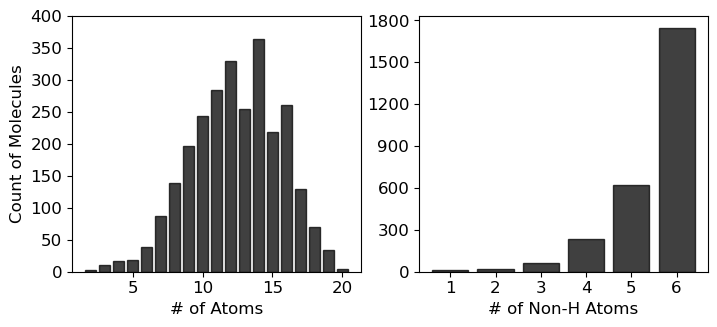

In [6]:
cm = 1/2.54  # centimeters in inches
fig, ax = plt.subplots(1,2,figsize=(18*cm,8*cm),sharey= False)
fig.tight_layout()

# atoms
tot_atoms = data_all['# Atoms'].values
labels, counts = np.unique(tot_atoms, return_counts=True)
ax[0].bar(labels, counts, align='center',facecolor='black', edgecolor='black', alpha=0.75)
ax[0].xaxis.set_tick_params(labelsize=12)
ax[0].yaxis.set_tick_params(labelsize=12)
ax[0].set_yticks(np.arange(0,450,50))
print('Maximum label, # of Mols: ',labels[np.where(counts==np.max(counts))[0][0]],np.max(counts))
# ax[0].text(0.90, 0.95, '(1)', transform=ax[0].transAxes, fontsize=14,
#         verticalalignment='top')

print(np.sum(counts))
ax[0].set_xlabel('# of Atoms',fontsize=12)
ax[0].set_ylabel('Count of Molecules',fontsize=12)

# heavy atoms
labels, counts = np.unique(tot_nH_atoms_list, return_counts=True)
ax[1].bar(labels, counts, align='center',facecolor='black', edgecolor='black', alpha=0.75)
ax[1].xaxis.set_tick_params(labelsize=12)
ax[1].yaxis.set_tick_params(labelsize=12)
ax[1].set_xticks([1,2,3,4,5,6])
ax[1].set_yticks([0,300,600,900,1200,1500,1800])

ax[1].set_xlabel('# of Non-H Atoms',fontsize=12)
# ax[1].text(0.90, 0.95, '(2)', transform=ax[1].transAxes, fontsize=14,
#         verticalalignment='top')

print(counts)

# # rota bonds
# SMILES = data['SMILES'].values
# rota_bond_list = []
# for smile in SMILES:
#     mol = Chem.MolFromSmiles(smile)
#     molh = Chem.AddHs(mol)
#     rota_bond = Chem.rdMolDescriptors.CalcNumRotatableBonds(molh,strict = Chem.rdMolDescriptors.NumRotatableBondsOptions.StrictLinkages)
#     rota_bond_list.append(rota_bond)
#     #print(rota_bond)
# labels, counts = np.unique(rota_bond_list, return_counts=True)
# ax[2].bar(labels, counts, align='center',facecolor='steelblue', edgecolor='black', alpha=0.75)
# ax[2].xaxis.set_tick_params(labelsize=14)
# ax[2].yaxis.set_tick_params(labelsize=14)

# ax[2].set_xlabel('# Rotatable Bonds',fontsize=14)
# ax[2].text(0.90, 0.95, '(3)', transform=ax[2].transAxes, fontsize=14,
#         verticalalignment='top')

plt.savefig('/Users/z5380625/Documents/Research/4_BigData/Plots/basiccharacteristics_histos.pdf',bbox_inches='tight')
plt.show()